<a href="https://colab.research.google.com/github/Shontom6/ML_Algorithms/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import os
import matplotlib.pyplot as plt


Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/10


d:\SEM_2_SETU\ml\ML_Algorithms_shon\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 56/100 ━━━━━━━━━━━━━━━━━━━━ 8s 192ms/step - accuracy: 0.5413 - loss: 0.6804

d:\SEM_2_SETU\ml\ML_Algorithms_shon\.venv\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 211ms/step - accuracy: 0.5901 - loss: 0.6472 - val_accuracy: 0.7400 - val_loss: 0.4963
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 204ms/step - accuracy: 0.8287 - loss: 0.3954 - val_accuracy: 0.7688 - val_loss: 0.4410
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 202ms/step - accuracy: 0.8716 - loss: 0.3078 - val_accuracy: 0.8800 - val_loss: 0.2939
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 203ms/step - accuracy: 0.8921 - loss: 0.2594 - val_accuracy: 0.8938 - val_loss: 0.2665
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 221ms/step - accuracy: 0.9299 - loss: 0.1845 - val_accuracy: 0.8612 - val_loss: 0.3341
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 207ms/step - accuracy: 0.9278 - loss: 0.1961 - val_accuracy: 0.8950 - val_loss: 0.2658
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 213ms/step - accuracy: 0.9500 - loss: 0.1451 - val_accuracy: 0.8875 - val_loss: 0.2564
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 255ms/step - accuracy: 0.9464 - loss: 0.1534 - val

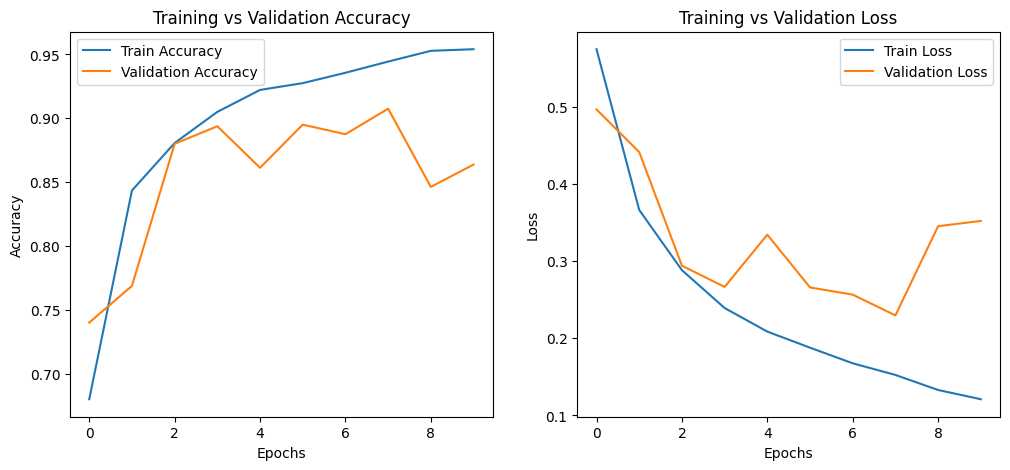

In [5]:

# Define dataset path
dataset_path = "Car-Bike-Dataset"  

# Image Data Generator
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Build CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (Car or Bike)
])

# Compile model
model.compile(optimizer=RMSprop(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])#RMSprop(learning_rate=1e-4,adam

# Train model
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot Accuracy & Loss Graphs
plt.figure(figsize=(12, 5))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# Show the plots
plt.show()

# Save the model for future use
model.save("car_bike_classifier.h5")